<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### The Lasso for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)



### PGE 383 Exercise: The Lasso for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of the lasso for regression for subsurface modeling workflows. This should help you get started with building subsurface models with data analytics and machine learning. Here's some basic details about the lasso. 

The lasso is an extension of linear regresion, and is closely related to ridge regression so let's review some basic details about linear regression first and then related the lasso to ridge regression.

Here's complete workflows and more details on these:

[Linear Regression](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_LinearRegression.ipynb)

[Ridge Regression](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_RidgeRegression.ipynb)


#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.

* the parametric model takes the form of: 

\begin{equation}
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
\end{equation}

**Least Squares**

* least squares optimization is applied to select the model parameters, $b_1,\ldots,b_m,b_0$ 

* we minize the error, residual sum of squares (RSS) over the training data: 

\begin{equation}
RSS = \sum_{i=1}^n (y_i - \left(\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0)\right)^2
\end{equation}

* this could be simplified as the sum of square error over the training data, 

\begin{equation}
\sum_{i=1}^n (\Delta y_i)^2
\end{equation}

**Assumptions**

* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Other Resources

In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided linear regression demonstration in R:

1. [R](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R)
2. [R Markdown](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd) 
3. [knit as an HTML document](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) 

#### The Lasso

With the lasso we add a hyperparameter, $\lambda$, to our minimization, with a shrinkage penalty term.

\begin{equation}
\sum_{i=1}^n \left(y_i - \left(\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0 \right) \right)^2 + \lambda \sum_{j=1}^m |b_{\alpha}|
\end{equation}

As a result the lasso has 2 criteria:

1. set the model parameters to minimize the error with training data

2. shrink the estimates of the slope parameters towards zero. Note: the intercept is not affected by the lambda, $\lambda$, hyperparameter.

Note the only difference between the lasso and ridge regression is:

* for the lasso the shrinkage term is posed as an $\ell_1$ penalty ($\lambda \sum_{\alpha=1}^m |b_{\alpha}|$) 

* for ridge regression the shrinkage term is posed as an $\ell_2$ penalty ($\lambda \sum_{\alpha=1}^m \left(b_{\alpha}\right)^2$).

While both ridge regression and the lasso shrink the model parameters ($b_{\alpha}, \alpha = 1,\ldots,m$) towards zero:

* the lasso parameters reach zero at different rates for each predictor feature as the lambda, $\lambda$, hyperparameter increases. 

* as a result the lasso provides a method for feature ranking and selection!

The lambda, $\lambda$, hyperparameter controls the degree of fit of the model and may be related to the model variance and bias trade-off.

* for $\lambda \rightarrow 0$ the prediction model approaches linear regression, there is lower model bias, but the model variance is higher

* as $\lambda$ increases the model variance decreases and the model bias increases

* for $\lambda \rightarrow \infty$ the coefficients all become 0.0 and the model is the global mean

#### Workflow Goals

Learn the basics of the lasso in Python to for analysis, modeling and prediction of porosity from density. This includes:

* Basic Python workflows and data preparation

* Training / fitting a the lasso model and comparison to ridge regression

* Checking the model and learning about the impact of hyperparameters

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
from sklearn.metrics import mean_squared_error, r2_score    # specific measures to check our models
from sklearn.linear_model import Ridge                      # ridge regression implemented in scikit learn
from sklearn.linear_model import Lasso                      # the lasso implemented in scikit learn
from sklearn.model_selection import cross_val_score         # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.preprocessing import StandardScaler            # standardize the features
from sklearn import metrics                                 # measures to check our models
from sklearn.linear_model import LinearRegression           # linear regression implemented in scikit learn

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [2]:
#os.chdir("C:\PGE383")                                       # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 density ($\frac{g}{cm^3}$) and porosity (as a fraction) measures from the subsurface. We load the data file with the pandas 'read_csv' function into a data frame we called 'df' and then separate it into train and test datasets.  The smaples are in random order so we just split the dataset at the 80th sample.  We preview each with the head function from Pandas DataFrames.

In [3]:
#df = pd.read_csv("Density_Por_data.csv")                    # read a .csv file in as a DataFrame
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv")
#df_mv = pd.read_csv("unconv_MV.csv")                        # load a multivariate dataset that we will use later
df_mv = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv")
df_train = df.iloc[0:80,:]                                  # extract a training set, note samples are random ordered
df_train.head()                                             # preview the DataFrame

,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


In [4]:
df_test = df.iloc[80:]                                      # extract a testing set, note samples are random ordered
df_test.head()                                              # preview the DataFrame

,Density,Porosity
80,1.750352,11.325941
81,1.666285,15.609445
82,1.466517,17.066529
83,1.650921,13.876841
84,0.996736,20.964941


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.  We will summarize over the training and testing subsets separately.

In [5]:
df_train.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Density,80.0,1.759945,0.295260,1.067960,1.552707,1.767908,1.953262,2.410560
Porosity,80.0,12.187127,3.125755,4.966421,10.011526,12.170687,14.063670,19.600717


In [6]:
df_test.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Density,25.0,1.667429,0.257608,0.996736,1.568988,1.718085,1.791432,2.339324
Porosity,25.0,13.632564,2.948887,9.489298,11.325941,13.767060,15.051759,20.964941


Here we extract the ndarrays with porsity and density, training and testing datasets separate arrays for convenience.

In [7]:
por_train = df_train['Porosity'].values                     # make a shallow copy of the features for convenvience                   
den_train = df_train['Density'].values
por_test = df_test['Porosity'].values
den_test = df_test['Density'].values
n_train = len(df_train); n_test = len(df_test)              # get the number of data in training and testing

#### Linear Regression Model

Let's first calculate the linear regression model. We use scikit learn and then extend the same workflow to ridge regression.

Coefficients:  -8.961, Intercept:  27.958


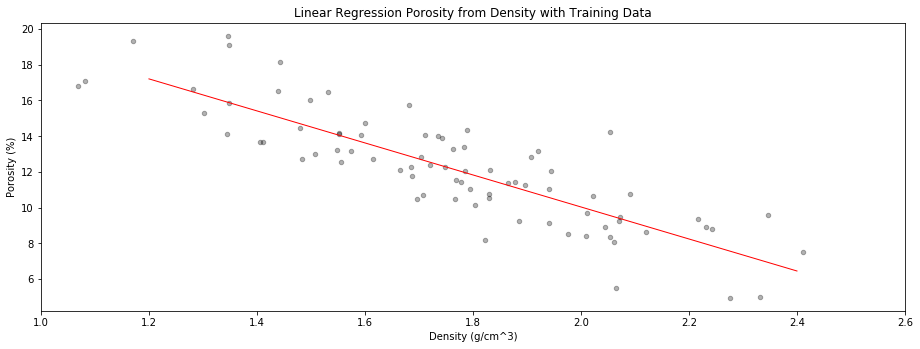

In [8]:
# Step 1. Instantiate the Model 
linear_reg = LinearRegression()                             # instantiate the linear regression model

# Step 2: Fit the Data on Training Data
linear_reg.fit(df_train["Density"].values.reshape(n_train,1), df_train["Porosity"]) # fit model
density_model = np.linspace(1.2,2.4,10)

# Print the model parameters
porosity_model = linear_reg.predict(density_model.reshape(10,1)) # predict with the fit model
print('Coefficients: ', str(round(linear_reg.coef_[0],3)) + ', Intercept: ', str(round(linear_reg.intercept_,3))) 

# Plot model fit
plt.subplot(111)
plt.scatter(df_train["Density"].values, df_train["Porosity"],  color='black', s = 20, alpha = 0.3)
plt.plot(density_model,porosity_model, color='red', linewidth=1)
plt.title('Linear Regression Porosity from Density with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.,2.6)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Let's run some quick model checks.  Much more could be done, but I limit this for breviety here. 

Variance explained: 0.58
Residual: mean = -0.62, standard deviation = 3.13


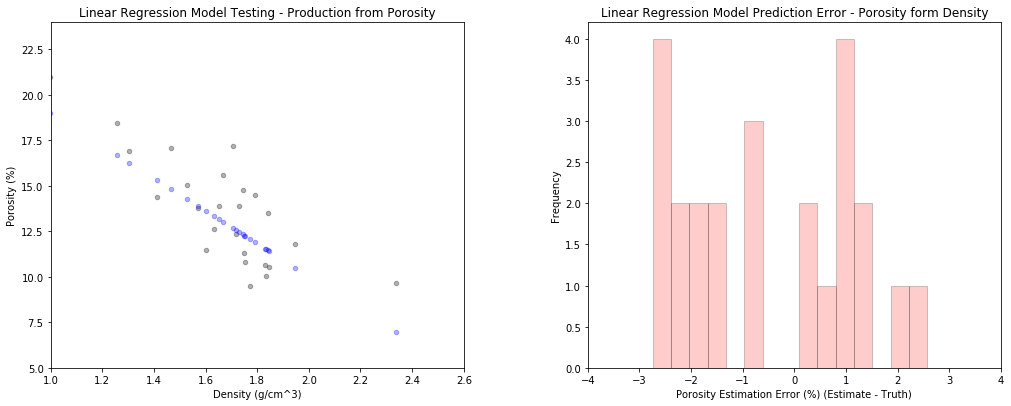

In [9]:
# Step 3: - Make predictions using the testing dataset
y_pred = linear_reg.predict(df_test['Density'].values.reshape(n_test,1))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(df_test['Porosity'].values, y_pred))

# Plot testing diagnostics 
plt.subplot(121)
plt.scatter(df_test['Density'].values, df_test['Porosity'].values,  color='black', s = 20, alpha = 0.3)
plt.scatter(df_test['Density'], y_pred, color='blue', s = 20, alpha = 0.3)
plt.title('Linear Regression Model Testing - Production from Porosity'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.0,2.6); plt.ylim(5,24)

y_res = y_pred - df_test['Porosity'].values

print('Residual: mean = ' + str(round(np.average(y_res),2)) + ', standard deviation = ' + str(round(np.var(y_res),2)))

plt.subplot(122)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Linear Regression Model Prediction Error - Porosity form Density'); plt.xlabel('Porosity Estimation Error (%) (Estimate - Truth)'); plt.ylabel('Frequency')
plt.xlim(-4,4)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Ridge Regression

Let's replace the scikit learn linear regression method with the scikit learn ridge regression method.  Note, we must now set the lambda hyperparameter.

* the hyperparameter is set with the instantiation of the model

Coefficients:  -8.961, Intercept:  27.958


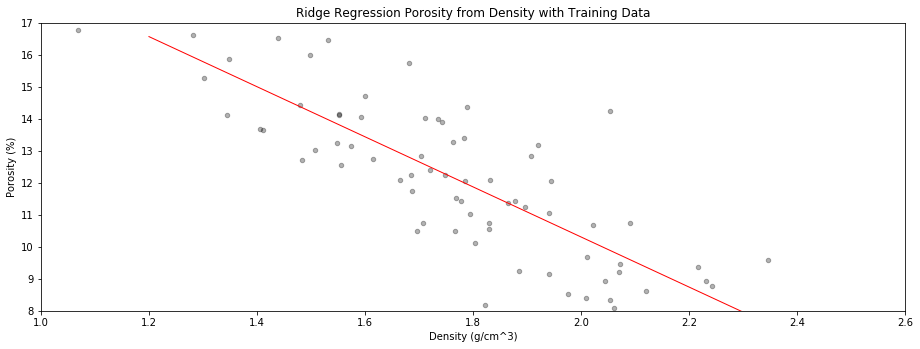

In [10]:
lam = 1.0

# Step 1. Instantiate the Model 
ridge_reg = Ridge(alpha=lam)

# Step 2: Fit the Data on Training Data
ridge_reg.fit(df_train["Density"].values.reshape(n_train,1), df_train["Porosity"]) # fit model
density_model = np.linspace(1.2,2.4,10)

# Print the model parameters
porosity_ridge_model = ridge_reg.predict(density_model.reshape(10,1)) # predict with the fit model
print('Coefficients: ', str(round(linear_reg.coef_[0],3)) + ', Intercept: ', str(round(linear_reg.intercept_,3))) 

# Plot model fit
plt.subplot(111)
plt.scatter(df_train["Density"].values, df_train["Porosity"],  color='black', s = 20, alpha = 0.3)
plt.plot(density_model,porosity_ridge_model, color='red', linewidth=1)
plt.title('Ridge Regression Porosity from Density with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.,2.6); plt.ylim(8,17)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Let's repeat the simple model checks that we applied with our linear regression model.

Variance explained: 0.55
Residual: mean = -0.72, standard deviation = 3.22


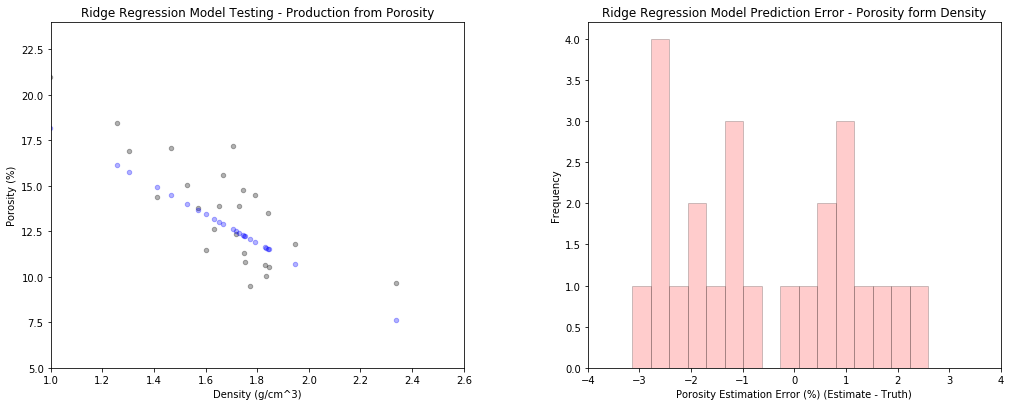

In [11]:
# Step 3: - Make predictions using the testing dataset
y_pred = ridge_reg.predict(df_test['Density'].values.reshape(n_test,1))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(df_test['Porosity'].values, y_pred))

# Plot testing diagnostics 
plt.subplot(121)
plt.scatter(df_test['Density'].values, df_test['Porosity'].values,  color='black', s = 20, alpha = 0.3)
plt.scatter(df_test['Density'], y_pred, color='blue', s = 20, alpha = 0.3)
plt.title('Ridge Regression Model Testing - Production from Porosity'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.0,2.6); plt.ylim(5,24)

y_res = y_pred - df_test['Porosity'].values

print('Residual: mean = ' + str(round(np.average(y_res),2)) + ', standard deviation = ' + str(round(np.var(y_res),2)))

plt.subplot(122)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Ridge Regression Model Prediction Error - Porosity form Density'); plt.xlabel('Porosity Estimation Error (%) (Estimate - Truth)'); plt.ylabel('Frequency')
plt.xlim(-4,4)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

Interesting, we explained less variance and have a larger residual standard deviation (more error).

* we reduced both testing variance explained and accuracy in this case! 

#### the Lasso

Let's replace the scikit learn linear regression and ridge regression methods with the scikit learn the lasso method.  Note, we must now set the lambda hyperparameter.

* the lambda hyperparameter, $\lambda$, is set with the instantiation of the model

Coefficients:  -8.961, Intercept:  27.958


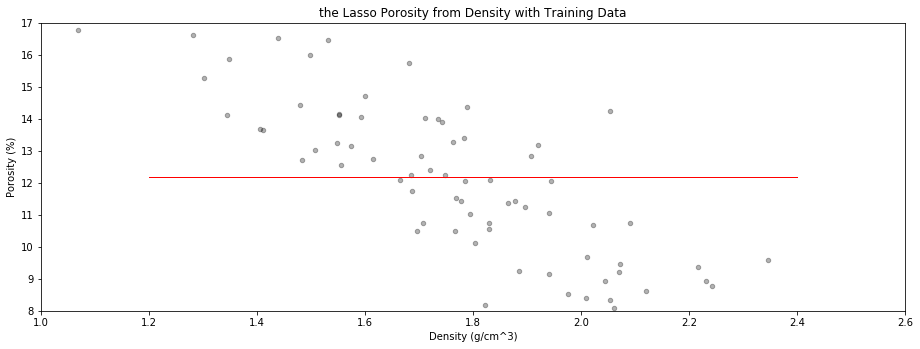

In [12]:
lam = 1.0

# Step 1. Instantiate the Model 
lasso_reg = Lasso(alpha=lam)

# Step 2: Fit the Data on Training Data
lasso_reg.fit(df_train["Density"].values.reshape(n_train,1), df_train["Porosity"]) # fit model
density_model = np.linspace(1.2,2.4,10)

# Print the model parameters
porosity_lasso_model = lasso_reg.predict(density_model.reshape(10,1)) # predict with the fit model
print('Coefficients: ', str(round(linear_reg.coef_[0],3)) + ', Intercept: ', str(round(linear_reg.intercept_,3))) 

# Plot model fit
plt.subplot(111)
plt.scatter(df_train["Density"].values, df_train["Porosity"],  color='black', s = 20, alpha = 0.3)
plt.plot(density_model,porosity_lasso_model, color='red', linewidth=1)
plt.title('the Lasso Porosity from Density with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.,2.6); plt.ylim(8,17)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Let's repeat the simple model checks that we applied with our linear regression model.

Variance explained: -0.25
Residual: mean = -1.45, standard deviation = 8.35


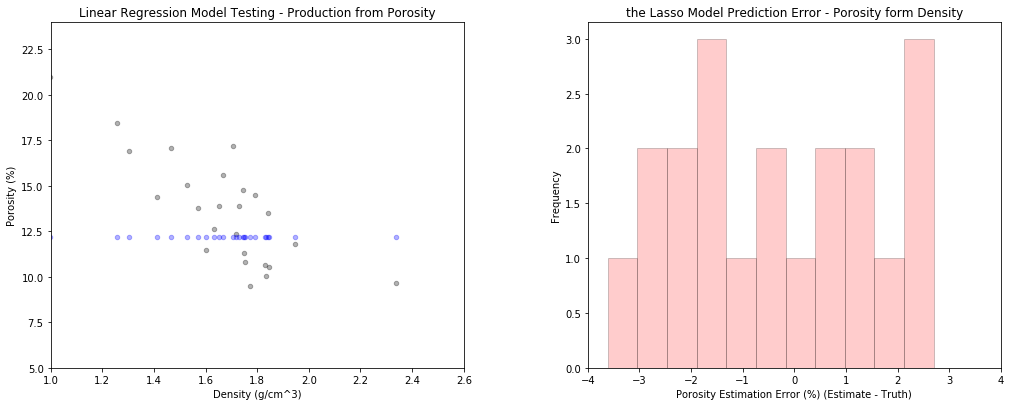

In [13]:
# Step 3: - Make predictions using the testing dataset
y_pred = lasso_reg.predict(df_test['Density'].values.reshape(n_test,1))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(df_test['Porosity'].values, y_pred))

# Plot testing diagnostics 
plt.subplot(121)
plt.scatter(df_test['Density'].values, df_test['Porosity'].values,  color='black', s = 20, alpha = 0.3)
plt.scatter(df_test['Density'], y_pred, color='blue', s = 20, alpha = 0.3)
plt.title('Linear Regression Model Testing - Production from Porosity'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.0,2.6); plt.ylim(5,24)

y_res = y_pred - df_test['Porosity'].values

print('Residual: mean = ' + str(round(np.average(y_res),2)) + ', standard deviation = ' + str(round(np.var(y_res),2)))

plt.subplot(122)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('the Lasso Model Prediction Error - Porosity form Density'); plt.xlabel('Porosity Estimation Error (%) (Estimate - Truth)'); plt.ylabel('Frequency')
plt.xlim(-4,4)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

What happenned? With our set lambda level

```python
lam = 1.0
```

the lasso model removed the density feature and estimated with the global mean.  The lasso attempts to remove features as a function of the lambda level, in other words, the lasso performs feature selection! Let's investigate this model behavoir.

#### Investigating the Lambda Hyperparameter

Let's look at the multivariate dataset that we already loaded. This way we can observe the model behavoir over a range of features, for a range of lambda hyperparameter values.

We will first remove the well index and preview the multivariate unconventional dataset.

In [14]:
df_mv = df_mv.drop('WellIndex',axis = 1)                    # remove the well index feature
df_mv.head()                                                # load the comma delimited data file

,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919


Let's calculate the summary statistics for our data.

In [15]:
df_mv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


Let's standardize the feature to have:

* mean = 0.0
* variance = standard deviation = 1.0

To do this we:

1. instantiate the StandardScaler from scikit learn. We assign it as 'scaler' so we can use it to conveniently reverse the transformation if we like. We will need to do that to get our predictions back into regular production units.

```python
scaler = StandardScaler()
```

2. we then extract all the values from our DataFrame and apply the by-column standardization.  The result is a 2D ndarray

```python
sfeatures = scaler.fit_transform(df_mv.values)
```
3. we make an new empty DataFrame

```python
df_nmv = pd.DataFrame()
```

4. then we add the transformed value to the new DataFrame while keeping the sample index and feature names from the old DataFramae

```python
df_nmv = pd.DataFrame(sfeatures, index=df_mv.index, columns=df_mv.columns)
```


In [16]:
scaler = StandardScaler()                                   # instantiate the scaler 
sfeatures = scaler.fit_transform(df_mv.values)              # standardize all the values extracted from the DataFrame 
df_nmv = pd.DataFrame()                                     # instantiate a new DataFrame
df_nmv = pd.DataFrame(sfeatures, index=df_mv.index, columns=df_mv.columns) # copy the standardized values into the new DataFrame
df_nmv.head()                                               # preview the the new DataFrame

,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,0.316877,0.668174,0.134046,-2.367004,0.705711,-0.458285,-1.414335
1,0.128641,0.618884,-0.662712,-1.183816,0.725523,-0.653065,-0.524438
2,1.816157,1.530747,0.255292,0.925747,1.557659,1.749222,1.485405
3,-0.990866,-0.638008,1.588995,0.603241,-1.196314,0.126055,-0.518596
4,1.512338,1.062493,-0.714674,-0.396131,0.784962,0.385762,2.059275


Let's check the summary statistics.

In [17]:
df_nmv.describe().transpose()                               # summary statistics from the new DataFrame

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,1.186273e-16,1.0005,-3.153925,-0.691175,0.011406,0.703255,3.203157
LogPerm,1000.0,-2.957079e-16,1.0005,-3.151793,-0.662653,-0.021885,0.692819,2.910864
AI,1000.0,4.085621e-16,1.0005,-3.503327,-0.701684,0.047442,0.653670,2.974660
Brittle,1000.0,1.703082e-16,1.0005,-3.996126,-0.663393,-0.002620,0.627130,2.903256
TOC,1000.0,2.389755e-16,1.0005,-2.503956,-0.720808,-0.017455,0.705711,3.380433
VR,1000.0,-3.831380e-16,1.0005,-3.542302,-0.588138,0.028665,0.588658,2.950365
Production,1000.0,-4.163336e-17,1.0005,-1.533683,-0.721496,-0.185038,0.530431,7.052394


Success, we have all features standardized.  We are ready to build our model.  Let's extract training and testing datasets.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_nmv.iloc[:,:6], pd.DataFrame({'Production':df_nmv['Production']}), test_size=0.33, random_state=73073)
print('Number of training data = ' + str(len(X_train)) + ' and number of testing data = ' + str(len(X_test)))

Number of training data = 670 and number of testing data = 330


Now let's observe the model coefficients ($b_{\alpha}, \alpha = 1,\ldots,m$) for a range of $\lambda$ hyperparameter values.

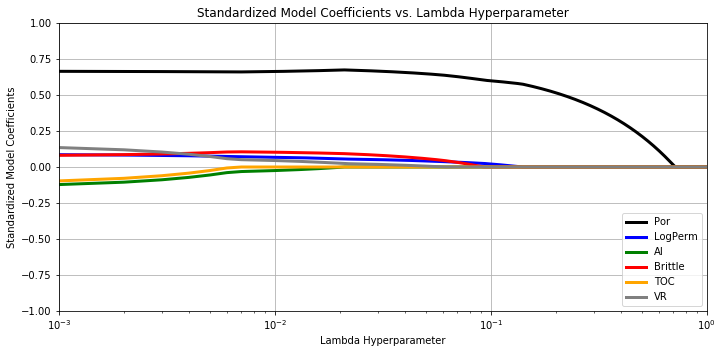

In [19]:
nbins = 1000                                                # number of bins to explore the hyperparameter 
df_nmv.describe().transpose()                               # summary statistics from the new DataFrame
lams = np.linspace(0.001,1.0,nbins)                         # make a list of lambda values
coefs = np.ndarray((nbins,6))

index = 0
for lam in lams:
    lasso_reg = Lasso(alpha=lam)                            # instantiate the model
    lasso_reg.fit(X_train, y_train)                         # fit model
    coefs[index,:] = lasso_reg.coef_                        # retreive the coefficients
    index = index + 1
    
color = ['black','blue','green','red','orange','grey']
plt.subplot(111)                                            # plot the results
for ifeature in range(0,6):
    plt.semilogx(lams,coefs[:,ifeature], label = df_mv.columns[ifeature], c = color[ifeature], linewidth = 3.0)

plt.title('Standardized Model Coefficients vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); plt.ylabel('Standardized Model Coefficients')
plt.xlim(0.001,1); plt.ylim(-1.0,1.0); plt.grid(); plt.legend(loc = 'lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1., wspace=0.2, hspace=0.2)
plt.show()

What do we see?

* for a very low lambda value, all features are included 

* as we increase the lambda hyperparameter, total organic carbon is the first predictor feature to be removed

* then acoustic impedance, vitrinite reflectance, brittleness, log perm and finally porosity.

* at $\lambda \ge 0.8$ all features are removed.

Let's repeat this workflow with ridge regression for contrast.

In [ ]:
nbins = 5000                                                # number of bins to explore the hyperparameter 
lams = np.logspace(-10,7,nbins)       
ridge_coefs = np.ndarray((nbins,6))

index = 0
for lam in lams:
    ridge_reg = Ridge(alpha=lam)
    ridge_reg.fit(X_train, y_train) # fit model
    ridge_coefs[index,:] = ridge_reg.coef_
    index = index + 1
    
color = ['black','blue','green','red','orange','grey']
plt.subplot(111)
for ifeature in range(0,6):
    plt.semilogx(lams,ridge_coefs[:,ifeature], label = df_mv.columns[ifeature], c = color[ifeature], linewidth = 3.0)

plt.title('Standardized Model Coefficients vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); plt.ylabel('Standardized Model Coefficients')
plt.xlim(1.0e-10,1.0e7); plt.ylim(-1.0,1.0); plt.grid(); plt.legend(loc = 'lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1., wspace=0.2, hspace=0.2)
plt.show()

Ridge regression is quite different in the response of predictor feature to change in the lambda hyperparameter.

* there is no selective removal of predictor features as the lambda hyperparameter increases

* a major component is uniform shrinkage of all coefficients towards zero for $\lambda \in [10^1, 10^5]$

Let's check the mode performance for both models over the hyperparameters. We check the mean squared error and the variance explained for:

* linear regression

* ridge regression 

* the lasso

In [ ]:
nbins = 1000                                               # number of bins
lams = np.logspace(-14,6,nbins)                           # assign equal bins in log space
ridge_error = []; lasso_error = []; linear_error = []
ridge_r2 = []; lasso_r2 = []; linear_r2 = []

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) # fit model
linear_predict = linear_reg.predict(X_test)
linear_err = metrics.mean_squared_error(y_test["Production"],linear_predict)
linear_r = metrics.r2_score(y_test["Production"],linear_predict)

index = 0
for lam in lams:
    ridge_reg = Ridge(alpha=lam)
    ridge_reg.fit(X_train, y_train) # fit model
    ridge_predict = ridge_reg.predict(X_test)
    ridge_error.append(metrics.mean_squared_error(y_test["Production"],ridge_predict))
    ridge_r2.append(metrics.r2_score(y_test["Production"],ridge_predict))
    lasso_reg = Lasso(alpha=lam)
    lasso_reg.fit(X_train, y_train) # fit model
    lasso_predict = lasso_reg.predict(X_test)
    lasso_error.append(metrics.mean_squared_error(y_test["Production"],lasso_predict))
    lasso_r2.append(metrics.r2_score(y_test["Production"],lasso_predict))
    linear_error.append(linear_err)
    linear_r2.append(linear_r)
    index = index + 1
    
color = ['black','blue','green','red','orange','grey']

plt.subplot(121)
plt.semilogx(lams,linear_error, label = 'Linear Regression', c = 'black', linewidth = 3.0)
plt.semilogx(lams,ridge_error, label = 'Ridge Regression', c = 'blue', linewidth = 3.0)
plt.semilogx(lams,lasso_error, label = 'the Lasso', c = 'red', linewidth = 3.0)
plt.title('Testing MSE vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); plt.ylabel('Mean Square Error')
plt.xlim(1.0e-14,1.0e6); plt.ylim(0.0,1.0); plt.grid(); plt.legend(loc = 'lower right')

plt.subplot(122)
plt.semilogx(lams,linear_r2, label = 'Linear Regression', c = 'black', linewidth = 3.0)
plt.semilogx(lams,ridge_r2, label = 'Ridge Regression', c = 'blue', linewidth = 3.0)
plt.semilogx(lams,lasso_r2, label = 'the Lasso', c = 'red', linewidth = 3.0)
plt.title('Testing Variance Explained vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); plt.ylabel('Variance Explained (R2)')
plt.xlim(1.0e-14,1.0e6); plt.ylim(0.0,1.0); plt.grid(); plt.legend(loc = 'upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

This is quite interesting. Let's make some observations.

* linear regression does not have the shrinkage term, nor the lambda parameter so the performance is constant

* for this problem linear regression is the best performer, lowest testing mean square error and higher testing variance explained

* at a low lambda value, ridge regression and the lasso approach linear regression

#### Model Variance 

Now let's explore the concept of model variance, an important part of machine learning accuracy in testing. 

* the sensitivity of the model to the specfic training data

* as lambda increases the sensitivity to the training data, model variance decreases

Let's demonstrate this with this workflow:

* loop over multiple lambda values
    * loop over multiple bootstrap samples of the data
        * calculate the ridge regression fit (slope)
    * calculate the variance of these bootstrap results


In [ ]:
L = 200                                                     # the number of bootstrap realizations 
nsamples = 20                                               # the number of samples in each bootstrap realization
nlambda = 100                                               # number of lambda values to evaluate

coef_mat = np.zeros(L)                                      # declare arrays to store the results
variance_coef = np.zeros(nlambda)

lamd_mat = np.linspace(0.0,100.0,nlambda)                  
for ilam in range(0,len(lamd_mat)):                         # loop over all lambda values                   
    for l in range(0, L):                                   # loop over all bootstrap realizations
        df_sample = df.sample(n = nsamples)                 # random sample (1 bootstrap)
        ridge_reg = Ridge(alpha=lamd_mat[ilam])             # instatiate model
        ridge_reg.fit(df_sample["Density"].values.reshape(nsamples,1), df_sample["Porosity"]) # fit model
        coef_mat[l] = ridge_reg.coef_[0]                    # get the slope parameter
    
    variance_coef[ilam] = np.var(coef_mat)                  # calculate the variance of the slopes over the L bootstraps

Now let's plot the result.

In [ ]:
plt.subplot(111)
plt.plot(lamd_mat, variance_coef,  color='black', linewidth = 2, label = 'Slope Variance')
plt.title('Model Fit Variance vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Model Fit Variance')
plt.xlim(0.,100.); plt.ylim(0.001,10.0); plt.yscale('log')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

The result is as expected, with increase in lambda hyperparameter the sensitivity of the model to the training data is decreased.


#### Comments

LASSO regression is a variant of linear regression that includes a hyperparameter to constrain the degree of model fit.  This allow us to tune the variance-bias trade-off of our model. I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
